In [1]:
import pandas as pd
from konlpy.tag import Okt
from gensim.models import word2vec

In [2]:
import matplotlib.pyplot as plt

In [3]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [4]:
import nltk # national language tool kit
from konlpy.tag import Okt
import matplotlib.pyplot as plt
from wordcloud import WordCloud

t = Okt()

[0.005s][warning][os,thread] Attempt to protect stack guard pages failed (0x0000000169c74000-0x0000000169c80000).
[0.005s][warning][os,thread] Attempt to deallocate stack guard pages failed.


In [5]:
# train_data불러오기
train = pd.read_csv("../../Data/train_data.csv", index_col='Unnamed: 0')

In [6]:
train.loc[40,:]

가수명                                                 어반자카파
노래제목                                         아직도 나를 사랑한다면
발매일                                            2016-05-27
가사      노래를 불러요 우릴 헤어지게 만든 그 노래를 이 일만 끝나면 더 잘할 수 있다고 그...
좋아요수                                                 7655
감정                                                 regret
Name: 40, dtype: object

In [7]:
happy_list = []
for i in range(0, 20):
    happy_list.append(train['가사'][i])

In [8]:
len(happy_list)

20

---
# happy 형태소 분리

In [9]:
# 텍스를 한 줄씩 처리하기
twitter = Okt()
results1 = []
lines = happy_list
for line in lines:
    # 형태소 분석하기 단어의 기본형 사용 안하기
    train_malist = twitter.pos(line) # 단어의 기본형 사용,norm=True,stem=True
    r = []
    for word in train_malist:
        # 어미, 조사, 구두점 등은 대상에서 제외
        if not word[1] in ["Josa","Eomi","Punctuation"]:
            # 동사만 추출
            if word[1] in ["Verb"]:
                if word[0] != "n":
                    r.append(word[0]) # word[0] : data
    rl_h = (" ".join(r).strip())
    
    results1.append(rl_h)
    #print(rl_v)

In [10]:
token_h = str(results1).split(" ")

In [11]:
# 불용어 추가
stop_words_happy = ["['만나면","안아줘',","'만들어","싶은',","'배웠죠","한',","'였을까","느낄',","'가봤어","잠잠',",\
    "'돌아만","바라봐줘요',","'빗나가는","믿어줘',","'봐요","피어나죠',","'만드는","와',","'지쳐","듣고',","'고를까",\
    "잠든',","'왔잖아","하고',","'애써","몰라주는',","다가갈게',","'따서","'살아왔는지","함께니까',","'불어오는","주세요',",\
        "'들어오면","빠진',","'내게","해',","'하고","봐',","'어린","떠올라']"]
token_happy = [each_word for each_word in token_h if each_word not in stop_words_happy]


In [12]:
# 상위 100개 단어 확인
ko_h = nltk.Text(token_happy)
ko_h.vocab().most_common(500)

[('나를', 29),
 ('해', 14),
 ('내게', 10),
 ('하면', 10),
 ('싶은', 9),
 ('봐', 9),
 ('갈께', 8),
 ('한', 7),
 ('된', 7),
 ('할', 6),
 ('추면서', 6),
 ('참', 6),
 ('와', 6),
 ('돼', 6),
 ('보며', 5),
 ('느낄', 5),
 ('본', 5),
 ('왔던', 5),
 ('봐도', 5),
 ('주세요', 5),
 ('떨리게', 4),
 ('하면서', 4),
 ('웃는', 4),
 ('잖아', 4),
 ('하는', 4),
 ('느껴', 4),
 ('할래', 4),
 ('질러', 4),
 ('해줘', 4),
 ('나도', 4),
 ('모르게', 4),
 ('부는', 4),
 ('하잖아', 4),
 ('싶어', 4),
 ('떠나지', 4),
 ('말아줘', 4),
 ('오면', 3),
 ('보면', 3),
 ('할게', 3),
 ('들으며', 3),
 ('기다리면서', 3),
 ('부르며', 3),
 ('이루는', 3),
 ('오질', 3),
 ('않네요', 3),
 ('멀어져', 3),
 ('만드는', 3),
 ('아껴줄게', 3),
 ('알까', 3),
 ('애써', 3),
 ('지펴', 3),
 ('던져', 3),
 ('모르는', 3),
 ('잠잠', 3),
 ('갈', 3),
 ('져서', 3),
 ('녹아내리면', 3),
 ('꿈꿔', 3),
 ('하며', 3),
 ('믿지', 3),
 ('하겠지만', 3),
 ('들리지만', 3),
 ('주고', 3),
 ('믿어줘', 3),
 ('떨리는', 3),
 ('보이는', 3),
 ('해봐요', 3),
 ('가고', 3),
 ('따라', 3),
 ('잊으려고', 3),
 ('해봐도', 3),
 ('잘', 3),
 ('된다고', 3),
 ('뜨면', 3),
 ('싶어요', 3),
 ('머물러줘요', 3),
 ('손잡아', 3),
 ('안아', 3),
 ('커져만', 3),
 ('가', 3),
 ('밤새워'

In [13]:
len(ko_h.vocab())

364

In [14]:
# # 불용어 작업후 빈도수가 1인 경우 전부 삭제 (특수기호 들어간경우가 대다수 이기때문에 제거하겠습니다.)
# testing_v = []
# for key, val in zip(list(ko_h.vocab().keys()),list(ko_h.vocab().values())):
#     if val < 2:
#         testing_v.append([key,val])
# testing_v2 = []
# for i in range(len(testing_v)):
#     testing_v2.append(str(testing_v[i][0]))

In [15]:
# # 1번 사용된 언어 지운후 다시 확인
# token_h = set(ko_h.vocab()) - set(testing_v2)
# token_ko_v2 = [each_word for each_word in token_list3 if each_word in token_h]
# ko_h = nltk.Text(token_ko_v2)
# ko_h.vocab().most_common(500)

In [16]:
# len(ko_v.vocab())

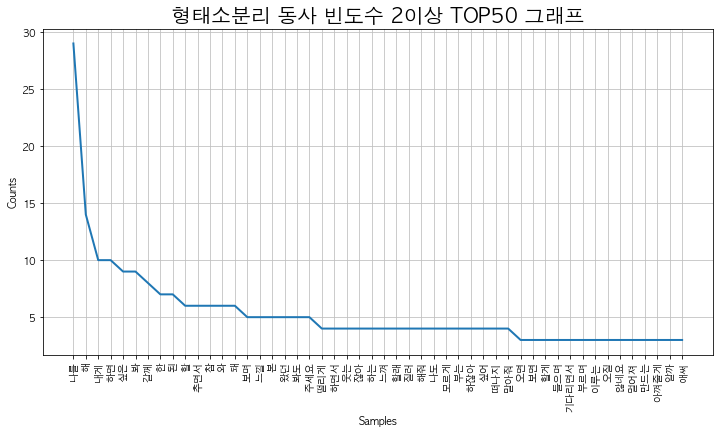

In [17]:
# 상위 50개의 빈도수 차트 만들기
plt.figure(figsize=(12,6))
plt.title("형태소분리 동사 빈도수 2이상 TOP50 그래프", size =20)
ko_h.plot(50)
plt.show()

In [18]:
# #워드클라우드의 모양 설정. 동사이미지 가져오기
# import numpy as np
# from PIL import *
# cand_mask=np.array(Image.open('../../Data/image/동사2.png'))

In [19]:
# 상위 200개만 wordcloud로 그리기
# 구한데이터로 그리기
data3 = ko_h.vocab().most_common(300)

# 딕셔너리로 만들기
tmp_data3 = dict(data3)

wordcloud3 = WordCloud(
   background_color='White',
    colormap= 'copper', # 글씨색은 ('copper','ocean','summer')
    # mask=cand_mask, # 워드클라우드 모양 설정
    relative_scaling=0.3,
    font_path="AppleGothic" 
).generate_from_frequencies(tmp_data3)

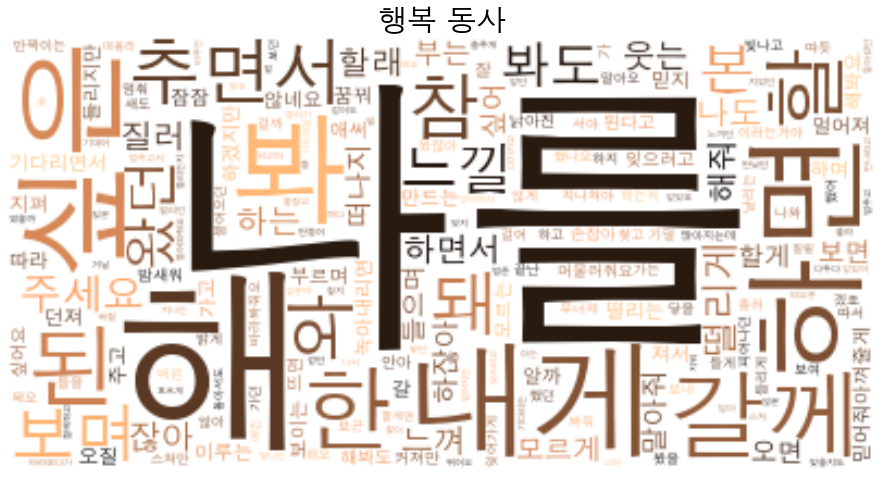

In [20]:
plt.figure(figsize=(16,8))
plt.title("행복 동사", size =30, weight = 'bold')
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis('off')
plt.show()


### 추출한 happy 토큰 확인하기

In [21]:
# 동사 토큰
print("동사토큰 : \n",list(ko_h.vocab())," => 동사 토큰 갯수 : ",len(list(ko_h.vocab())))

동사토큰 : 
 ['나를', '해', '내게', '하면', '싶은', '봐', '갈께', '한', '된', '할', '추면서', '참', '와', '돼', '보며', '느낄', '본', '왔던', '봐도', '주세요', '떨리게', '하면서', '웃는', '잖아', '하는', '느껴', '할래', '질러', '해줘', '나도', '모르게', '부는', '하잖아', '싶어', '떠나지', '말아줘', '오면', '보면', '할게', '들으며', '기다리면서', '부르며', '이루는', '오질', '않네요', '멀어져', '만드는', '아껴줄게', '알까', '애써', '지펴', '던져', '모르는', '잠잠', '갈', '져서', '녹아내리면', '꿈꿔', '하며', '믿지', '하겠지만', '들리지만', '주고', '믿어줘', '떨리는', '보이는', '해봐요', '가고', '따라', '잊으려고', '해봐도', '잘', '된다고', '뜨면', '싶어요', '머물러줘요', '손잡아', '안아', '커져만', '가', '밤새워', '낡아진', '밝게', '멈춰', '버린', '하는지', '들게', '서야', '겠죠', '닿을', '했나요', '찾고', '봤을', '걸어', '했어', '끝난', '지나쳐야', '이러는거야', '해요', '바라봐줘요', '했던', '걸까', '기댈', '스쳐만', '날리는', '흘려', '보내', '말아요', '빛나고', '나와', '보곤', '돼요', '새도', '않게', '반짝이는', '따듯', '않아', '왔잖아', '하고', '하지', '무너져', '가던', '잊어가게', '가는', '봐줘', '따서', '보여', '불어오던', '피어나던', '들을', '들리게', '많아지는데', '함께면', '질릴', '돌아서도', '여긴', '떠올라', '보던', '빠질', '거닐', '멈추고서', '바라보다가', '맞출지도', '몰라', '빛나는', '기대어', '잊지', '느끼던', '들', '비추는', '멈추고', '올', '다투다'

In [22]:
token_happy = list(ko_h.vocab())

---
# sad

In [23]:
sad_list = []
for i in range(20, 40):
    sad_list.append(train['가사'][i])

In [24]:
len(sad_list)

20

In [25]:
# 텍스를 한 줄씩 처리하기
twitter = Okt()
results2 = []
lines = sad_list
for line in lines:
    # 형태소 분석하기 단어의 기본형 사용 안하기
    train_malist = twitter.pos(line) # 단어의 기본형 사용,norm=True,stem=True
    r = []
    for word in train_malist:
        # 어미, 조사, 구두점 등은 대상에서 제외
        if not word[1] in ["Josa","Eomi","Punctuation"]:
            # 동사만 추출
            if word[1] in ["Verb"]:
                if word[0] != "n":
                    r.append(word[0]) # word[0] : data
    rl_s = (" ".join(r).strip())
    
    results2.append(rl_s)

In [26]:
token_s = str(results2).split(" ")

In [27]:
# 불용어 추가
stop_words_sad = ["'할","['떨어질","참',","'떠보니","['떨어질","떠보니',","'들었지","무너졌어',","'헤어지기로",\
    "해줘',","'돌아보지","잊혀질까',","'해야지","해',","'이었는지","는',","'끝나","봐',","'잊자","나도',","'지나면",\
    "비우지',","'알아볼","싶다',","'미루고","까','지울게","보낼',","'내리는","지우고',","'하고","기다린다',","할',",\
    "'보면","흐르는데',","할말',","'늦춘다면","사라지고',","'했는데","미워요']"]
token_sad = [each_word for each_word in token_s if each_word not in stop_words_sad]


In [28]:
# 상위 100개 단어 확인
ko_s = nltk.Text(token_sad)
ko_s.vocab().most_common(500)

[('봐', 22),
 ('할', 13),
 ('나를', 10),
 ('잘', 10),
 ('해', 9),
 ('했던', 9),
 ('버린', 8),
 ('애써', 7),
 ('나도', 7),
 ('한', 6),
 ('하면', 6),
 ('줘', 6),
 ('참', 6),
 ('걸까', 6),
 ('해줘', 6),
 ('마시고', 6),
 ('나면', 6),
 ('잖아', 6),
 ('했어', 5),
 ('돼', 5),
 ('들은', 5),
 ('견디기', 5),
 ('않을', 5),
 ('줬던', 5),
 ('바랄게', 5),
 ('내게', 5),
 ('바라만', 5),
 ('본다', 5),
 ('따라', 5),
 ('나와', 5),
 ('잊고', 4),
 ('지워', 4),
 ('할게', 4),
 ('서', 4),
 ('보낼', 4),
 ('잊을', 4),
 ('하지', 4),
 ('다가갈', 4),
 ('가져가', 4),
 ('지워줘', 4),
 ('싶어', 4),
 ('안기던', 4),
 ('맞추던', 4),
 ('걷던', 3),
 ('지나면', 3),
 ('되는', 3),
 ('웃는', 3),
 ('되어', 3),
 ('봐도', 3),
 ('가버리면', 3),
 ('들려오는', 3),
 ('하려해', 3),
 ('보낼게', 3),
 ('돌아보지', 3),
 ('하는', 3),
 ('했단', 3),
 ('않아', 3),
 ('듣던', 3),
 ('남겨', 3),
 ('됐고', 3),
 ('잊어', 3),
 ('모르는', 3),
 ('싶다', 3),
 ('헤어져야', 3),
 ('만난다면', 3),
 ('하길', 3),
 ('보면', 3),
 ('미운', 3),
 ('싶죠', 3),
 ('오겠지', 2),
 ('떠올리는', 2),
 ('생각나', 2),
 ('이었다', 2),
 ('떠나가면', 2),
 ('감으면', 2),
 ('될', 2),
 ('참을', 2),
 ('딴', 2),
 ('해도', 2),
 ('지내', 2),
 ('하기를', 2),
 ('

In [29]:
len(ko_s.vocab())

408

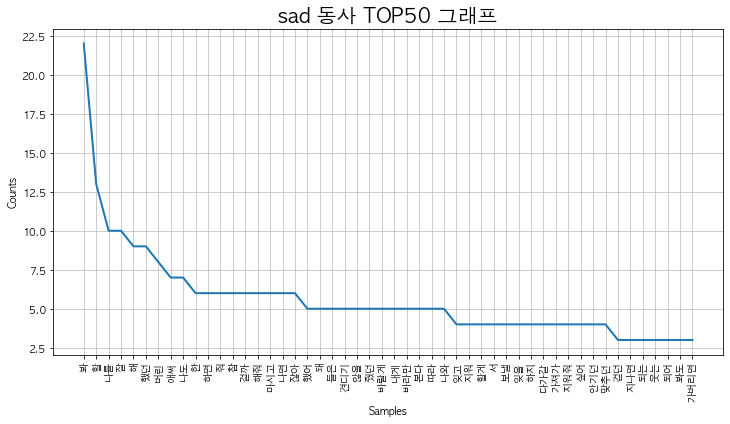

In [30]:
# sad 상위 50개의 빈도수 차트 만들기
plt.figure(figsize=(12,6))
plt.title("sad 동사 TOP50 그래프", size =20)
ko_s.plot(50)
plt.show()

In [31]:
# #워드클라우드의 모양 설정. 동사이미지 가져오기
# import numpy as np
# from PIL import *
# cand_mask=np.array(Image.open('../../Data/image/동사2.png'))

In [32]:
# 상위 200개만 wordcloud로 그리기
# 구한데이터로 그리기
data3 = ko_s.vocab().most_common(300)

# 딕셔너리로 만들기
tmp_data3 = dict(data3)

wordcloud3 = WordCloud(
   background_color='White',
    colormap= 'copper', # 글씨색은 ('copper','ocean','summer')
    # mask=cand_mask, # 워드클라우드 모양 설정
    relative_scaling=0.3,
    font_path="AppleGothic" 
).generate_from_frequencies(tmp_data3)

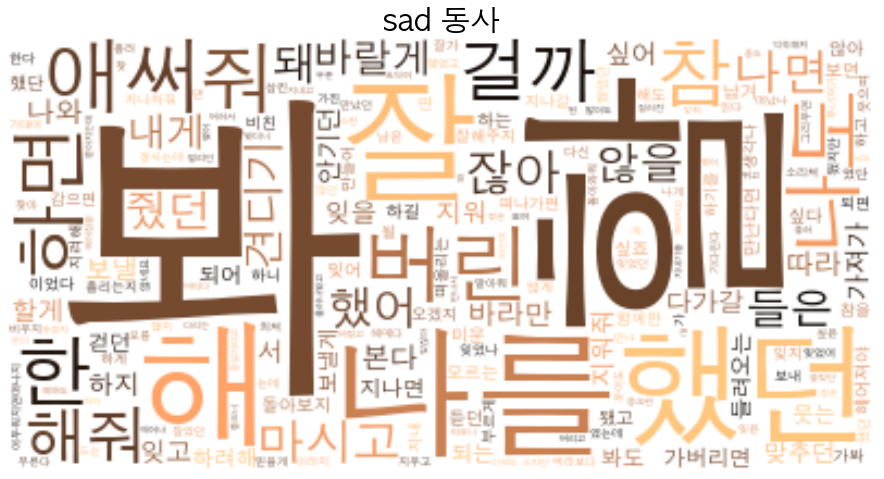

In [33]:
plt.figure(figsize=(16,8))
plt.title("sad 동사", size =30, weight = 'bold')
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis('off')
plt.show()

### 추출한 sad 토큰 확인하기

In [34]:
# sad 동사 토큰
print("동사토큰 : \n",list(ko_s.vocab())," => 동사 토큰 갯수 : ",len(list(ko_s.vocab())))

동사토큰 : 
 ['봐', '할', '나를', '잘', '해', '했던', '버린', '애써', '나도', '한', '하면', '줘', '참', '걸까', '해줘', '마시고', '나면', '잖아', '했어', '돼', '들은', '견디기', '않을', '줬던', '바랄게', '내게', '바라만', '본다', '따라', '나와', '잊고', '지워', '할게', '서', '보낼', '잊을', '하지', '다가갈', '가져가', '지워줘', '싶어', '안기던', '맞추던', '걷던', '지나면', '되는', '웃는', '되어', '봐도', '가버리면', '들려오는', '하려해', '보낼게', '돌아보지', '하는', '했단', '않아', '듣던', '남겨', '됐고', '잊어', '모르는', '싶다', '헤어져야', '만난다면', '하길', '보면', '미운', '싶죠', '오겠지', '떠올리는', '생각나', '이었다', '떠나가면', '감으면', '될', '참을', '딴', '해도', '지내', '하기를', '잘해주지', '잊지', '하니', '지나갈', '가봐', '하고', '함께한', '비친', '만들어', '지려해', '부르게', '되면', '지나쳐줘', '웃으며', '않게', '됐지만', '였던', '다신', '잘가', '가', '였단', '흘리는지', '한다', '하게', '남은', '보내', '했었던', '잊었나', '잘사는데', '모를', '떠났나', '말아줘', '만나', '삼킨', '잊었어', '가진', '만났던', '나게', '이러지', '떠나지', '비우지', '외쳐', '부른다', '싶은', '는데', '참았던', '흘러', '바라보다', '소리쳐', '했었고', '였는데', '잊은', '어두워지면', '헤매다', '잊었던', '드는', '지우고', '웃어도', '찾아', '기다린다', '않던', '잦', '읽다', '했지', '믿을게', '그리우면', '무너져가', '돌아와줘', '기대어', '까', '댄', '않네요', '몰랐던',

In [35]:
token_sad = list(ko_s.vocab())

---
# regret

In [36]:
train.loc[40,:]

가수명                                                 어반자카파
노래제목                                         아직도 나를 사랑한다면
발매일                                            2016-05-27
가사      노래를 불러요 우릴 헤어지게 만든 그 노래를 이 일만 끝나면 더 잘할 수 있다고 그...
좋아요수                                                 7655
감정                                                 regret
Name: 40, dtype: object

In [37]:
regret_list = []
for i in range(40, 60):
    regret_list.append(train['가사'][i])

In [38]:
len(regret_list)

20

In [39]:
# 텍스를 한 줄씩 처리하기
twitter = Okt()
results3 = []
lines = regret_list
for line in lines:
    # 형태소 분석하기 단어의 기본형 사용 안하기
    train_malist = twitter.pos(line) # 단어의 기본형 사용,norm=True,stem=True
    r = []
    for word in train_malist:
        # 어미, 조사, 구두점 등은 대상에서 제외
        if not word[1] in ["Josa","Eomi","Punctuation"]:
            # 동사만 추출
            if word[1] in ["Verb"]:
                if word[0] != "n":
                    r.append(word[0]) # word[0] : data
    rl_r = (" ".join(r).strip())
    
    results3.append(rl_r)

In [40]:
token_r = str(results3).split(" ")

In [41]:
# 불용어 추가
stop_words_regret = ["돌아와',","해',","['불러요","기다리면',","'댈","해요',","'만나게","한다면',","'봐","할게',","'내렸지","'와서","안아줘',","'다가왔던",\
    "와줘요',","돼',","'했다고","됐어',","'앉아","삼킨다',","'어리기만","'난다","쉬어가면',","'만나서","'달아날","말아요',","'싸우다","않도록',","'하기까지가",\
    "줘',","'나는요","기다린다고',","'떠나지마","'주고받고","밝아서',","'외우듯이","싶어서']",]
token_regret = [each_word for each_word in token_r if each_word not in stop_words_regret]


In [42]:
# 상위 100개 단어 확인
ko_r = nltk.Text(token_regret)
ko_r.vocab().most_common(500)

[('나를', 20),
 ('한', 16),
 ('봐', 13),
 ('내게', 11),
 ('했던', 10),
 ('참', 10),
 ('밝아서', 10),
 ('하지', 9),
 ('해서', 9),
 ('댈', 7),
 ('돌아와', 7),
 ('한다면', 6),
 ('다신', 6),
 ('잘', 6),
 ('해', 6),
 ('않아', 6),
 ('버린', 6),
 ('잊을', 6),
 ('도망가', 6),
 ('돼', 5),
 ('봐도', 5),
 ('않을', 5),
 ('만나서', 5),
 ('싶어', 5),
 ('헤어지기', 5),
 ('할', 4),
 ('댄', 4),
 ('해줘요', 4),
 ('했죠', 4),
 ('하는', 4),
 ('나였다면', 4),
 ('나도', 4),
 ('하면', 4),
 ('한다고', 4),
 ('잊지', 4),
 ('알면서', 4),
 ('하며', 4),
 ('본', 4),
 ('기다리면', 3),
 ('다가와요', 3),
 ('해요', 3),
 ('해준다면', 3),
 ('싶은', 3),
 ('보내고', 3),
 ('만나게', 3),
 ('말아요', 3),
 ('건지', 3),
 ('보낼', 3),
 ('했어', 3),
 ('불러', 3),
 ('돌아오라고', 3),
 ('싶다고', 3),
 ('와', 3),
 ('두고', 3),
 ('보내지', 3),
 ('멈춘', 3),
 ('지울', 3),
 ('붙잡지', 3),
 ('않는', 3),
 ('하고', 3),
 ('소리쳐', 3),
 ('빛나던', 3),
 ('줬던', 3),
 ('놓아', 3),
 ('버릴까', 3),
 ('움켜쥐지만', 3),
 ('쫓아', 3),
 ('쉬어가면', 3),
 ('해야', 3),
 ('했을까', 3),
 ('울었어', 3),
 ('안아줘', 3),
 ('듣는다면', 3),
 ('기다린다고', 3),
 ('지냈어', 3),
 ('올까', 3),
 ('걸어줘요', 2),
 ('않던', 2),
 ('지친', 2),
 ('기다릴게요',

In [43]:
len(ko_r.vocab())

403

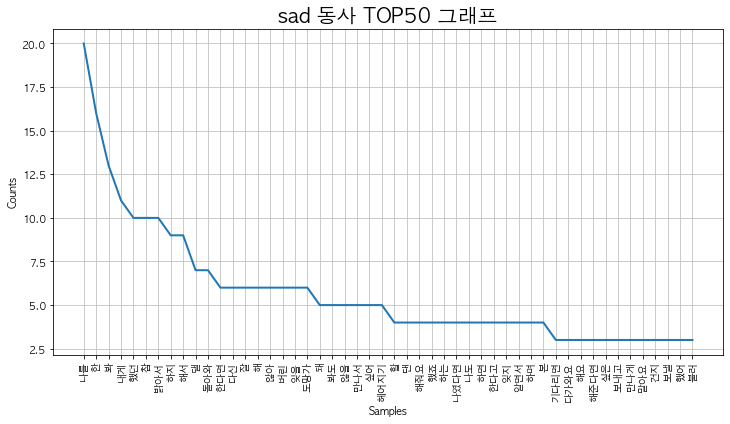

In [44]:
# regret 상위 50개의 빈도수 차트 만들기
plt.figure(figsize=(12,6))
plt.title("sad 동사 TOP50 그래프", size =20)
ko_r.plot(50)
plt.show()

In [45]:
# 상위 200개만 wordcloud로 그리기
# 구한데이터로 그리기
data3 = ko_r.vocab().most_common(300)

# 딕셔너리로 만들기
tmp_data3 = dict(data3)

wordcloud3 = WordCloud(
   background_color='White',
    colormap= 'copper', # 글씨색은 ('copper','ocean','summer')
    # mask=cand_mask, # 워드클라우드 모양 설정
    relative_scaling=0.3,
    font_path="AppleGothic" 
).generate_from_frequencies(tmp_data3)

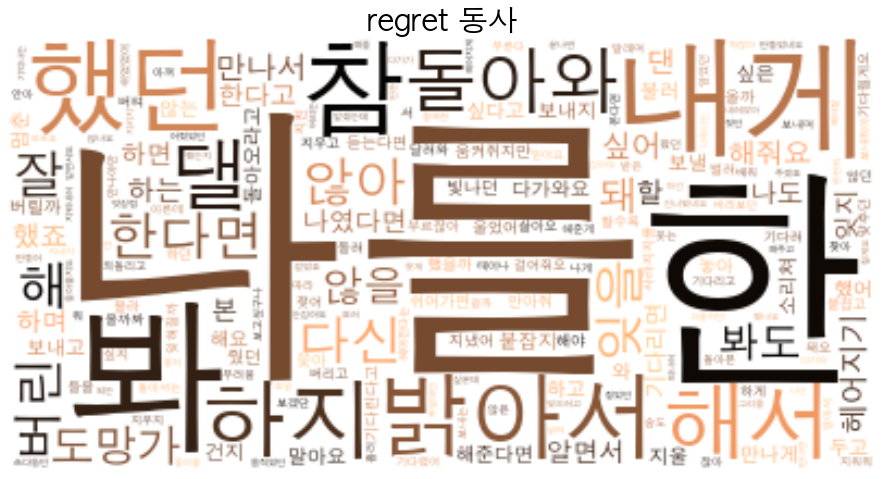

In [46]:
plt.figure(figsize=(16,8))
plt.title("regret 동사", size =30, weight = 'bold')
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis('off')
plt.show()

### 추출한 regret 토큰 확인하기

In [47]:
# regret 동사 토큰
print("동사토큰 : \n",list(ko_r.vocab())," => 동사 토큰 갯수 : ",len(list(ko_r.vocab())))

동사토큰 : 
 ['나를', '한', '봐', '내게', '했던', '참', '밝아서', '하지', '해서', '댈', '돌아와', '한다면', '다신', '잘', '해', '않아', '버린', '잊을', '도망가', '돼', '봐도', '않을', '만나서', '싶어', '헤어지기', '할', '댄', '해줘요', '했죠', '하는', '나였다면', '나도', '하면', '한다고', '잊지', '알면서', '하며', '본', '기다리면', '다가와요', '해요', '해준다면', '싶은', '보내고', '만나게', '말아요', '건지', '보낼', '했어', '불러', '돌아오라고', '싶다고', '와', '두고', '보내지', '멈춘', '지울', '붙잡지', '않는', '하고', '소리쳐', '빛나던', '줬던', '놓아', '버릴까', '움켜쥐지만', '쫓아', '쉬어가면', '해야', '했을까', '울었어', '안아줘', '듣는다면', '기다린다고', '지냈어', '올까', '걸어줘요', '않던', '지친', '기다릴게요', '하던', '하게', '할수록', '사라지지를', '지우고', '싶지', '몰라', '들을', '돌려', '젖어', '버리고', '기다려', '잊혀질까', '서', '부르잖아', '올까봐', '돼요', '붙잡고', '버텨', '살아요', '벌려', '달려와', '맞추던', '기다리고', '돌아본', '바라보던', '돌아서는', '해준게', '부른다', '보고싶구나', '태어나', '부러울', '기다렸어', '받은', '나게', '되돌리고', '아껴', '지우지', '찾아', '이른데', '알아서', '헤어진다는', '보내줘야', '보내며', '달래며', '걸까', '알았던', '왔던', '따라', '보겠단', '잖아', '줘', '믿어요', '만나야만', '지워줘', '안아', '숨도', '쉬었었어', '흘러', '않은', '웃는', '온다면', '보내는', '배워', '헤어지게', '만든', '끝나면', '괴롭히던', '만들어', 

In [48]:
token_regret = list(ko_r.vocab())

---
# indifference

In [49]:
train.loc[79,:]

가수명                                            펀치 (Punch)
노래제목                                               헤어지는 중
발매일                                            2018-09-12
가사      나를 사랑하나요 같은 곳을 보나요 이미 알고 있어요 아닌 걸 알죠 배우지 않았어도 ...
좋아요수                                               125919
감정                                           indifference
Name: 79, dtype: object

In [50]:
indifference_list = []
for i in range(60, 80):
    indifference_list.append(train['가사'][i])

In [51]:
len(indifference_list)

20

In [52]:
# 텍스를 한 줄씩 처리하기
twitter = Okt()
results4 = []
lines = indifference_list
for line in lines:
    # 형태소 분석하기 단어의 기본형 사용 안하기
    train_malist = twitter.pos(line) # 단어의 기본형 사용,norm=True,stem=True
    r = []
    for word in train_malist:
        # 어미, 조사, 구두점 등은 대상에서 제외
        if not word[1] in ["Josa","Eomi","Punctuation"]:
            # 동사만 추출
            if word[1] in ["Verb"]:
                if word[0] != "n":
                    r.append(word[0]) # word[0] : data
    rl_i = (" ".join(r).strip())
    
    results4.append(rl_i)

In [53]:
token_i = str(results4).split(" ")

In [54]:
# 불용어 추가
stop_words_indifference = ["'나를","['된","쉬어요',","'하는","기댄',","채우네',","'잊는다는","잊는다는',","'비는","주고',","'걷는다","만나러',",\
    "'나면","견딜',","'잃어서","해줘',","'큰","오면은',","'내게","가',","'이었을거야","갔네',","'따라","그쳐가',","'해줬었던","내게',","'태어난다면",\
        "기를',","'물러나","기다리는',","'만나서","가봐',","'닿을","머문',","'했었지", "걷지',","'걸어가는","되돌릴',","할래']",]
token_indifference = [each_word for each_word in token_i if each_word not in stop_words_indifference]


In [55]:
# 상위 100개 단어 확인
ko_i = nltk.Text(token_indifference)
ko_i.vocab().most_common(500)

[('내게', 18),
 ('할', 16),
 ('하는', 13),
 ('되는', 11),
 ('한', 11),
 ('걷는다', 8),
 ('않을', 7),
 ('해', 7),
 ('남은', 6),
 ('봐', 6),
 ('댈', 5),
 ('참', 5),
 ('하게', 5),
 ('그리', 5),
 ('하지', 5),
 ('돌아와', 5),
 ('만나서', 4),
 ('잊는다는', 4),
 ('가', 4),
 ('될까', 4),
 ('나를', 4),
 ('했고', 4),
 ('만나게', 4),
 ('이뤄져', 4),
 ('했지', 4),
 ('끝난', 4),
 ('말아요', 3),
 ('해야', 3),
 ('하겠어', 3),
 ('돼', 3),
 ('해도', 3),
 ('멀어지는', 3),
 ('잡아도', 3),
 ('견딜', 3),
 ('들려오는', 3),
 ('느껴지는', 3),
 ('커져가던', 3),
 ('갇혀', 3),
 ('잃고', 3),
 ('울리던', 3),
 ('들리지', 3),
 ('작아져', 3),
 ('가는', 3),
 ('엇갈린', 3),
 ('지나쳐', 3),
 ('맞는', 3),
 ('알아요', 3),
 ('갈', 3),
 ('누르고', 3),
 ('채우다', 3),
 ('지우며', 3),
 ('덜어내', 3),
 ('몰랐을까', 3),
 ('이뤄질', 3),
 ('지킬', 3),
 ('머문', 3),
 ('감추려', 3),
 ('달래며', 3),
 ('돌아', 3),
 ('잖아', 3),
 ('해요', 2),
 ('지켜', 2),
 ('왔죠', 2),
 ('들어와', 2),
 ('미운', 2),
 ('쏟아내', 2),
 ('주긴', 2),
 ('서', 2),
 ('뜨지', 2),
 ('않는데', 2),
 ('않은', 2),
 ('숨어있든', 2),
 ('찾아줘', 2),
 ('껴', 2),
 ('나온', 2),
 ('비춰줘', 2),
 ('들', 2),
 ('해줬던', 2),
 ('했었던', 2),
 ('일까', 2),
 ('잊어

In [56]:
len(ko_i.vocab())

387

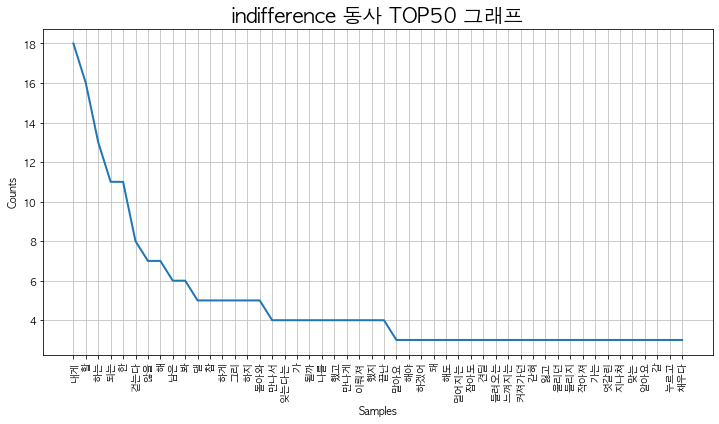

In [57]:
# indifference 상위 50개의 빈도수 차트 만들기
plt.figure(figsize=(12,6))
plt.title("indifference 동사 TOP50 그래프", size =20)
ko_i.plot(50)
plt.show()

In [58]:
# 상위 200개만 wordcloud로 그리기
# 구한데이터로 그리기
data4 = ko_i.vocab().most_common(300)

# 딕셔너리로 만들기
tmp_data4 = dict(data3)

wordcloud4 = WordCloud(
   background_color='White',
    colormap= 'copper', # 글씨색은 ('copper','ocean','summer')
    # mask=cand_mask, # 워드클라우드 모양 설정
    relative_scaling=0.3,
    font_path="AppleGothic" 
).generate_from_frequencies(tmp_data4)

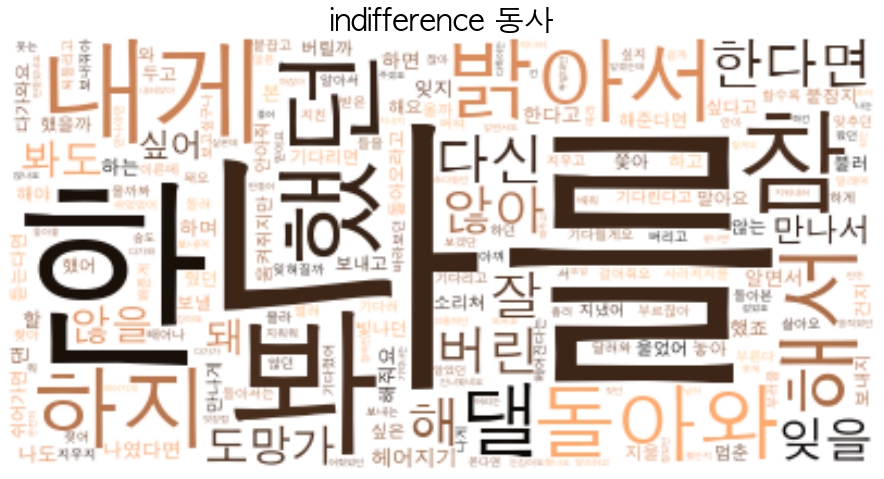

In [59]:
plt.figure(figsize=(16,8))
plt.title("indifference 동사", size =30, weight = 'bold')
plt.imshow(wordcloud4, interpolation='bilinear')
plt.axis('off')
plt.show()

### 추출한 indifference 토큰 확인하기

In [60]:
# regret 동사 토큰
print("동사토큰 : \n",list(ko_i.vocab())," => 동사 토큰 갯수 : ",len(list(ko_i.vocab())))

동사토큰 : 
 ['내게', '할', '하는', '되는', '한', '걷는다', '않을', '해', '남은', '봐', '댈', '참', '하게', '그리', '하지', '돌아와', '만나서', '잊는다는', '가', '될까', '나를', '했고', '만나게', '이뤄져', '했지', '끝난', '말아요', '해야', '하겠어', '돼', '해도', '멀어지는', '잡아도', '견딜', '들려오는', '느껴지는', '커져가던', '갇혀', '잃고', '울리던', '들리지', '작아져', '가는', '엇갈린', '지나쳐', '맞는', '알아요', '갈', '누르고', '채우다', '지우며', '덜어내', '몰랐을까', '이뤄질', '지킬', '머문', '감추려', '달래며', '돌아', '잖아', '해요', '지켜', '왔죠', '들어와', '미운', '쏟아내', '주긴', '서', '뜨지', '않는데', '않은', '숨어있든', '찾아줘', '껴', '나온', '비춰줘', '들', '해줬던', '했었던', '일까', '잊어야겠지', '않았었나', '해서', '보내', '떠나간', '빌어줄', '하면', '보는', '않았어', '알던', '느껴져', '멈춰진', '몰라', '보니', '해줘', '쉽게', '춥게', '만들어', '부르기로', '했어', '열린', '올', '바라보다', '뜨고', '말았네', '갔네', '했죠', '와', '그려도', '된', '지워가며', '찾아', '만나는', '해보려', '지낼', '했던', '외려', '가져', '온다는', '빌게요', '않길', '잊고', '되었어', '찢어질', '잘', '가봐', '여기까', '떠나며', '떠나가듯이', '흔들며', '남겨져', '꺼라고', '끝낼까', '걷지', '걸까', '되돌릴', '모른', '사는', '지칠', '지쳐있는', '돼줄게요', '늦게', '서글퍼질', '쉬어요', '찾지', '섞인', '걷고', '싶을', '웃어', '보일까', '기댄', '내리고', '떠나가도', 

In [61]:
token_indifference = list(ko_i.vocab())

---
# 벤다이어그램 시각화

In [62]:
# pip install venn

In [63]:
# 벤다이어 그램 설치 필요
%matplotlib inline

import venn

In [64]:
labels = venn.get_labels([
           set(token_happy), set(token_sad), set(token_regret), set(token_indifference)
        ])
print(labels)


{'0001': '243 ', '0010': '242 ', '0011': '24 ', '0100': '239 ', '0101': '27 ', '0110': '39 ', '0111': '17 ', '1000': '234 ', '1001': '16 ', '1010': '20 ', '1011': '8 ', '1100': '19 ', '1101': '14 ', '1110': '15 ', '1111': '38 '}


/Users/uyoung/miniforge3/envs/tensorflow/lib/python3.9/site-packages/venn/_backwards_compatibility.py:15: UserWarning: `get_labels()` is retained for backwards compatibility; use `generate_petal_labels()` or the higher level `venn()` instead
  warn((


In [65]:
import warnings
warnings.filterwarnings("ignore")

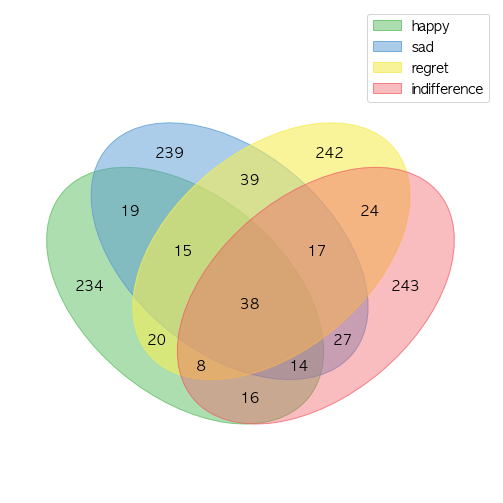

In [66]:
fig, ax = venn.venn4(labels, names=['happy', 'sad','regret','indifference'])
fig.show()

In [67]:
# 벤다이어 그램에서 차집합한 결과단어 확인하기
set1 = set(token_happy) - set(token_sad) - set(token_regret) - set(token_indifference)
set2 = set(token_sad) - set(token_regret) - set(token_indifference)- set(token_happy)
set3 = set(token_regret) - set(token_indifference)- set(token_happy) - set(token_sad)
set4 = set(token_indifference)- set(token_happy) - set(token_sad) - set(token_regret)
print(len(set1),"\n",set(token_happy)-set1,"\n\n")
print(len(set2),"\n",set(token_sad)-set2,"\n\n")
print(len(set3),"\n",set(token_regret)-set3,"\n\n")
print(len(set4),"\n",set(token_indifference)-set4,"\n\n")

234 
 {'듣고', '본', '돼', '떨리는', '젖어', '잊으려고', '갈', '해봐도', '만들어', '해', '된다고', '나서', '잖아', '않네요', '싶은', '싶어', '남은', '불어오는', '했었던', '지워', '올', '보며', '알아요', '한', '웃으며', '봐도', '만나서', '말아줘', '나를', '할지', '걷던', '까', '버리고', '하고', '될', '가는', '기대어', '돼요', '보다가', '비춰', '떠올라', '떨리던', '끝난', '긴', '가', '알던', '않을', '날까', '들', '찾고', '했나요', '다가가', '왔던', '몰라', '했어', '지나면', '보여', '걷는', '했었죠', '멈춘', '서야', '하며', '기다리는', '참아', '싶은데', '건넨', '않게', '웃고', '않아', '떠나지', '해요', '하는', '잊지', '않은', '보려', '보내', '내게', '들을', '잘', '붙잡고', '된', '않아요', '해서', '찾아', '흘러가는', '보는', '말아요', '만드는', '모르는', '하잖아', '기다려', '봐', '만났던', '버린', '보이는', '채워', '댈', '멀어지는', '할게', '걸까', '따라', '하지', '건지', '됐나', '않아도', '머문', '나도', '되어', '않는', '와', '참', '멀어져', '나와', '보면', '닿을', '할', '서', '왔죠', '불러', '스쳐', '해줘', '하면', '가고', '비워', '안아', '했는데', '애써', '모르게', '웃는', '했던'} 


239 
 {'듣고', '하는데', '돼', '써', '젖은', '잊으려고', '함께한', '드는', '해봐도', '만들어', '지', '미운', '해', '였던', '잖아', '않네요', '싶은', '싶어', '남은', '맞추던', '않을까', '만나게', '불어오는', '했었던', '되면', '지워', '보낼', '보며', '

### 중복 제거한 happy 1글자 이하 지우기

In [68]:
happy = list(set1)
print(happy)

['보낸', '봤고', '떨려요', '가던', '따서', '믿어줘', '내게는', '지펴', '하면서', '숨겨놓은', '아른거릴', '들리게', '일어나는', '들어줬음', '해봐요', '할까봐', '여긴', '반짝이는', '해볼게요', '잃은', '멈춰', '걸었으면', '뛰어요', '웃잖아', '잠든', '들어주는것도', '보곤', '볼게요', '만나라고', '빛나고', '울려도', '밤새워', '다가가고', '품고', '달리는', '바라는', '모자란', '반겨주던', '움츠린', '기다리면서', '밝게', '차올라서', '하는지', '들리지만', '만져', '질릴', '흘려', '함께면', '알까', '질러', '남는걸', '덮어줄게요', '걷더라도', '느껴지던', '춥지', '지으면', '추운', '잠잠', '뜬', '데려다', '담아', '낡아진', '지나도', '잊으라고', '떠올려', '멈추고서', '오면', '할래', '였을까', '바뀐', '따라가', '봐요', '줬죠', '마주칠', '지날', '커져만', '울리는', '웃어주는것도', '부셔', '내는', '돌아섰던', '알려줘서', '봤을', '느껴', '느껴져요', '빠졌나', '뜨던', '끔', '들리는지', '주세요', '지나쳐야', '남아있어', '돌아서도', '기억나지', '숨겨', '머물', '날리고', '많아지는데', '불어오던', '참아요', '와줘', '바라보다가', '웃어주면', '지나치던', '져서', '이루는', '잡아', '떴어', '떨리게', '들어가', '꿈꿔', '담고', '갔는지', '웃는데', '뛰어놀곤', '되고야', '걸어가기만', '녹아내리면', '들어와줘요', '내민', '데려다주던', '갈께', '왔잖아', '들게', '줬으면', '춤추게', '그려', '빛나는', '빠져', '지켜주던', '씻어내', '빠질', '알았죠', '떨어져서', '되고', '뒤척거리는', '봤던', '뛰어갈', '하겠지만', '알았어', '알아줄', '내리면', '새

In [69]:
# 한글자 0 값 넣기
for i in range(len(happy)):
    if len(happy[i]) <= 1:
        happy[i] = 0
    else:
        happy[i] = happy[i]

In [70]:
print(happy)

['보낸', '봤고', '떨려요', '가던', '따서', '믿어줘', '내게는', '지펴', '하면서', '숨겨놓은', '아른거릴', '들리게', '일어나는', '들어줬음', '해봐요', '할까봐', '여긴', '반짝이는', '해볼게요', '잃은', '멈춰', '걸었으면', '뛰어요', '웃잖아', '잠든', '들어주는것도', '보곤', '볼게요', '만나라고', '빛나고', '울려도', '밤새워', '다가가고', '품고', '달리는', '바라는', '모자란', '반겨주던', '움츠린', '기다리면서', '밝게', '차올라서', '하는지', '들리지만', '만져', '질릴', '흘려', '함께면', '알까', '질러', '남는걸', '덮어줄게요', '걷더라도', '느껴지던', '춥지', '지으면', '추운', '잠잠', 0, '데려다', '담아', '낡아진', '지나도', '잊으라고', '떠올려', '멈추고서', '오면', '할래', '였을까', '바뀐', '따라가', '봐요', '줬죠', '마주칠', '지날', '커져만', '울리는', '웃어주는것도', '부셔', '내는', '돌아섰던', '알려줘서', '봤을', '느껴', '느껴져요', '빠졌나', '뜨던', 0, '들리는지', '주세요', '지나쳐야', '남아있어', '돌아서도', '기억나지', '숨겨', '머물', '날리고', '많아지는데', '불어오던', '참아요', '와줘', '바라보다가', '웃어주면', '지나치던', '져서', '이루는', '잡아', '떴어', '떨리게', '들어가', '꿈꿔', '담고', '갔는지', '웃는데', '뛰어놀곤', '되고야', '걸어가기만', '녹아내리면', '들어와줘요', '내민', '데려다주던', '갈께', '왔잖아', '들게', '줬으면', '춤추게', '그려', '빛나는', '빠져', '지켜주던', '씻어내', '빠질', '알았죠', '떨어져서', '되고', '뒤척거리는', '봤던', '뛰어갈', '하겠지만', '알았어', '알아줄', '내리면', '새도', 

In [71]:
# 0 값 지우기
remove_set = {0}

happy = [i for i in happy if i not in remove_set]
print(happy, len(happy))

['보낸', '봤고', '떨려요', '가던', '따서', '믿어줘', '내게는', '지펴', '하면서', '숨겨놓은', '아른거릴', '들리게', '일어나는', '들어줬음', '해봐요', '할까봐', '여긴', '반짝이는', '해볼게요', '잃은', '멈춰', '걸었으면', '뛰어요', '웃잖아', '잠든', '들어주는것도', '보곤', '볼게요', '만나라고', '빛나고', '울려도', '밤새워', '다가가고', '품고', '달리는', '바라는', '모자란', '반겨주던', '움츠린', '기다리면서', '밝게', '차올라서', '하는지', '들리지만', '만져', '질릴', '흘려', '함께면', '알까', '질러', '남는걸', '덮어줄게요', '걷더라도', '느껴지던', '춥지', '지으면', '추운', '잠잠', '데려다', '담아', '낡아진', '지나도', '잊으라고', '떠올려', '멈추고서', '오면', '할래', '였을까', '바뀐', '따라가', '봐요', '줬죠', '마주칠', '지날', '커져만', '울리는', '웃어주는것도', '부셔', '내는', '돌아섰던', '알려줘서', '봤을', '느껴', '느껴져요', '빠졌나', '뜨던', '들리는지', '주세요', '지나쳐야', '남아있어', '돌아서도', '기억나지', '숨겨', '머물', '날리고', '많아지는데', '불어오던', '참아요', '와줘', '바라보다가', '웃어주면', '지나치던', '져서', '이루는', '잡아', '떴어', '떨리게', '들어가', '꿈꿔', '담고', '갔는지', '웃는데', '뛰어놀곤', '되고야', '걸어가기만', '녹아내리면', '들어와줘요', '내민', '데려다주던', '갈께', '왔잖아', '들게', '줬으면', '춤추게', '그려', '빛나는', '빠져', '지켜주던', '씻어내', '빠질', '알았죠', '떨어져서', '되고', '뒤척거리는', '봤던', '뛰어갈', '하겠지만', '알았어', '알아줄', '내리면', '새도', '숨겼던',

### 중복 제거한 sad 1글자 이하 지우기

In [72]:
sad = list(set2)
print(sad)

['뱉어', '남기고', '나면', '싶죠', '지울래', '웃어도', '뛰어가', '흘리는걸', '버려서', '찾아가지', '가질', '잘사는데', '이었다', '다리는', '떠나고', '됐는데', '먹는', '줬어', '늦어', '마음잡고', '맞춰', '들었으면', '꿈꾸는', '헤어짐을', '이었을까', '견뎌', '는데', '지나쳐줘', '하기', '삼키면서', '무너졌나', '읽다', '달랠', '지워질', '질수록', '토닥여', '모르니', '말았던', '됐지만', '기다린다', '물어보지', '살아갈', '않다가도', '떠나면', '잊었던', '손잡고', '버티다', '안긴', '삼킨', '깨어나', '달라졌을까', '했더라면', '지워야겠지', '들린', '믿을게', '지내고', '들으니', '서있어', '놔도', '다가오면', '되겠지', '해주던', '보내야', '메어와', '내려가다', '헤매', '흘릴게', '하기를', '다가갈', '달래다', '였단', '해보지만', '챌', '중얼거리고', '끝난거니', '멀어질', '밟아도', '헤어진단', '그리우면', '싶다', '잦', '괴롭히는', '가졌으니까', '지낸다고', '부른', '둘러보면', '웃던', '서두르던', '들썩여', '떠나가면', '뛰고', '줄까', '봤더니', '어렸던', '미워져', '비우지', '하니', '였어', '몰랐던', '떠나가줘', '그립겠지만', '잘가', '보낼게', '왔는데', '스친', '가져가', '들리도록', '짙어져', '돌아올지', '스치던', '헤매이는', '였는데', '떠날게', '나잖아', '지울게', '바랄게', '떠보니', '겠지', '살아가', '찾아낼', '느껴질', '간거니', '했단', '지워가지만', '낸', '하려해', '질러진', '지나갈', '하길', '돌아보지', '잘살고', '잊겠니', '잊었다', '보고싶었다고', '버티다가', '지려해', '듣게', '돌이킬', '지내기를', '쉽지', '잊어', '만나',

In [73]:
# 한글자 0 값 넣기
for i in range(len(sad)):
    if len(sad[i]) <= 1:
        sad[i] = 0
    else:
        sad[i] = sad[i]
print(sad)

['뱉어', '남기고', '나면', '싶죠', '지울래', '웃어도', '뛰어가', '흘리는걸', '버려서', '찾아가지', '가질', '잘사는데', '이었다', '다리는', '떠나고', '됐는데', '먹는', '줬어', '늦어', '마음잡고', '맞춰', '들었으면', '꿈꾸는', '헤어짐을', '이었을까', '견뎌', '는데', '지나쳐줘', '하기', '삼키면서', '무너졌나', '읽다', '달랠', '지워질', '질수록', '토닥여', '모르니', '말았던', '됐지만', '기다린다', '물어보지', '살아갈', '않다가도', '떠나면', '잊었던', '손잡고', '버티다', '안긴', '삼킨', '깨어나', '달라졌을까', '했더라면', '지워야겠지', '들린', '믿을게', '지내고', '들으니', '서있어', '놔도', '다가오면', '되겠지', '해주던', '보내야', '메어와', '내려가다', '헤매', '흘릴게', '하기를', '다가갈', '달래다', '였단', '해보지만', 0, '중얼거리고', '끝난거니', '멀어질', '밟아도', '헤어진단', '그리우면', '싶다', 0, '괴롭히는', '가졌으니까', '지낸다고', '부른', '둘러보면', '웃던', '서두르던', '들썩여', '떠나가면', '뛰고', '줄까', '봤더니', '어렸던', '미워져', '비우지', '하니', '였어', '몰랐던', '떠나가줘', '그립겠지만', '잘가', '보낼게', '왔는데', '스친', '가져가', '들리도록', '짙어져', '돌아올지', '스치던', '헤매이는', '였는데', '떠날게', '나잖아', '지울게', '바랄게', '떠보니', '겠지', '살아가', '찾아낼', '느껴질', '간거니', '했단', '지워가지만', 0, '하려해', '질러진', '지나갈', '하길', '돌아보지', '잘살고', '잊겠니', '잊었다', '보고싶었다고', '버티다가', '지려해', '듣게', '돌이킬', '지내기를', '쉽지', '잊어', '만나', "'지울게

In [74]:
# 0 값 지우기
remove_set = {0}

sad = [i for i in sad if i not in remove_set]
print(sad, len(sad))

['뱉어', '남기고', '나면', '싶죠', '지울래', '웃어도', '뛰어가', '흘리는걸', '버려서', '찾아가지', '가질', '잘사는데', '이었다', '다리는', '떠나고', '됐는데', '먹는', '줬어', '늦어', '마음잡고', '맞춰', '들었으면', '꿈꾸는', '헤어짐을', '이었을까', '견뎌', '는데', '지나쳐줘', '하기', '삼키면서', '무너졌나', '읽다', '달랠', '지워질', '질수록', '토닥여', '모르니', '말았던', '됐지만', '기다린다', '물어보지', '살아갈', '않다가도', '떠나면', '잊었던', '손잡고', '버티다', '안긴', '삼킨', '깨어나', '달라졌을까', '했더라면', '지워야겠지', '들린', '믿을게', '지내고', '들으니', '서있어', '놔도', '다가오면', '되겠지', '해주던', '보내야', '메어와', '내려가다', '헤매', '흘릴게', '하기를', '다가갈', '달래다', '였단', '해보지만', '중얼거리고', '끝난거니', '멀어질', '밟아도', '헤어진단', '그리우면', '싶다', '괴롭히는', '가졌으니까', '지낸다고', '부른', '둘러보면', '웃던', '서두르던', '들썩여', '떠나가면', '뛰고', '줄까', '봤더니', '어렸던', '미워져', '비우지', '하니', '였어', '몰랐던', '떠나가줘', '그립겠지만', '잘가', '보낼게', '왔는데', '스친', '가져가', '들리도록', '짙어져', '돌아올지', '스치던', '헤매이는', '였는데', '떠날게', '나잖아', '지울게', '바랄게', '떠보니', '겠지', '살아가', '찾아낼', '느껴질', '간거니', '했단', '지워가지만', '하려해', '질러진', '지나갈', '하길', '돌아보지', '잘살고', '잊겠니', '잊었다', '보고싶었다고', '버티다가', '지려해', '듣게', '돌이킬', '지내기를', '쉽지', '잊어', '만나', "'지울게", '잊었어',

### 중복 제거한 regret 1글자 이하 지우기

In [75]:
regret = list(set3)
print(regret)

['짓던', '나란', '돌아올지도', '왔어', '떨었지', '지울', '듣는다면', '쓰다듬으며', '보내기는', '받은', '내려앉아', '차올라', '흘렸죠', '부러울', '남겨졌단', '나였다면', '기나긴', '깨워주던', '떠나지마', '할께', '엇갈림', '도망가', '지나간', '어울려도', '늦기', '잡았던', '놓았을까', '돌아올꺼니', '감아도', '움켜쥐지만', '씻겨지질', '안겨서', '지나고', '기다리면', '기다릴게요', '웃어주던', '하는거니', '밝아서', '만들어줄게', '믿어요', '부르잖아', '잡으려', '서성일까', '돌려', '낀', '잔이었다면', '지듯이', '맞으며', '만나야만', '숨도', '돌아서는', '사라졌어', '버텨', '해주고', '난데', '소리칠', '기다리고', '알겠는데', '잠들고', '싶다고', '준다면', '해줬더라면', '놓아', '그렸어', '했는지', '돌아보며', '걸으면', '만든', '지우기엔', '다퉜었죠', '돌아오라고', '되냐고', '줬다면', '쫓아', '잊혀져', '하긴', '닦아', '보내며', '했을까', '헤어지기', '알아서', '보겠단', '움직였던', '사라지지를', '만들었네요', '울먹이던', '떠나는', '올까봐', '안아줄', '뒀다', '괴롭히던', '웃게', '뜨듯이', '싶었어', '하기는', '다퉜었지만', '떨어지질', '되돌리고', '해볼게', '함께여서', '끝내자는', '나이긴', '남기고서', '갖지', '쉬었었어', '담기', '어렸어요', '풀어', '기다릴게', '붙어', '붙잡지', '온전히', '돌아온다는', '몰랐나', '배워', '헤어지게', '채울게', '붙잡아도', '건너왔네요', '되질', '보내줘야', '잘해준', '투덜대던', '바뀌면', '걸고', '내려', '쓸', '달려와', '세워도', '남는거니', '헤어질', '그려질까', '쓰다', '태움도', '와줘요', '떨어지던', '돌아본', '

In [76]:
# 한글자 0 값 넣기
for i in range(len(regret)):
    if len(regret[i]) <= 1:
        regret[i] = 0
    else:
        regret[i] = regret[i]
print(regret)

['짓던', '나란', '돌아올지도', '왔어', '떨었지', '지울', '듣는다면', '쓰다듬으며', '보내기는', '받은', '내려앉아', '차올라', '흘렸죠', '부러울', '남겨졌단', '나였다면', '기나긴', '깨워주던', '떠나지마', '할께', '엇갈림', '도망가', '지나간', '어울려도', '늦기', '잡았던', '놓았을까', '돌아올꺼니', '감아도', '움켜쥐지만', '씻겨지질', '안겨서', '지나고', '기다리면', '기다릴게요', '웃어주던', '하는거니', '밝아서', '만들어줄게', '믿어요', '부르잖아', '잡으려', '서성일까', '돌려', 0, '잔이었다면', '지듯이', '맞으며', '만나야만', '숨도', '돌아서는', '사라졌어', '버텨', '해주고', '난데', '소리칠', '기다리고', '알겠는데', '잠들고', '싶다고', '준다면', '해줬더라면', '놓아', '그렸어', '했는지', '돌아보며', '걸으면', '만든', '지우기엔', '다퉜었죠', '돌아오라고', '되냐고', '줬다면', '쫓아', '잊혀져', '하긴', '닦아', '보내며', '했을까', '헤어지기', '알아서', '보겠단', '움직였던', '사라지지를', '만들었네요', '울먹이던', '떠나는', '올까봐', '안아줄', '뒀다', '괴롭히던', '웃게', '뜨듯이', '싶었어', '하기는', '다퉜었지만', '떨어지질', '되돌리고', '해볼게', '함께여서', '끝내자는', '나이긴', '남기고서', '갖지', '쉬었었어', '담기', '어렸어요', '풀어', '기다릴게', '붙어', '붙잡지', '온전히', '돌아온다는', '몰랐나', '배워', '헤어지게', '채울게', '붙잡아도', '건너왔네요', '되질', '보내줘야', '잘해준', '투덜대던', '바뀌면', '걸고', '내려', 0, '달려와', '세워도', '남는거니', '헤어질', '그려질까', '쓰다', '태움도', '와줘요', '떨어지던', '돌아본', '불러도'

In [77]:
# 0 값 지우기
remove_set = {0}

regret = [i for i in regret if i not in remove_set]
print(regret, len(regret))

['짓던', '나란', '돌아올지도', '왔어', '떨었지', '지울', '듣는다면', '쓰다듬으며', '보내기는', '받은', '내려앉아', '차올라', '흘렸죠', '부러울', '남겨졌단', '나였다면', '기나긴', '깨워주던', '떠나지마', '할께', '엇갈림', '도망가', '지나간', '어울려도', '늦기', '잡았던', '놓았을까', '돌아올꺼니', '감아도', '움켜쥐지만', '씻겨지질', '안겨서', '지나고', '기다리면', '기다릴게요', '웃어주던', '하는거니', '밝아서', '만들어줄게', '믿어요', '부르잖아', '잡으려', '서성일까', '돌려', '잔이었다면', '지듯이', '맞으며', '만나야만', '숨도', '돌아서는', '사라졌어', '버텨', '해주고', '난데', '소리칠', '기다리고', '알겠는데', '잠들고', '싶다고', '준다면', '해줬더라면', '놓아', '그렸어', '했는지', '돌아보며', '걸으면', '만든', '지우기엔', '다퉜었죠', '돌아오라고', '되냐고', '줬다면', '쫓아', '잊혀져', '하긴', '닦아', '보내며', '했을까', '헤어지기', '알아서', '보겠단', '움직였던', '사라지지를', '만들었네요', '울먹이던', '떠나는', '올까봐', '안아줄', '뒀다', '괴롭히던', '웃게', '뜨듯이', '싶었어', '하기는', '다퉜었지만', '떨어지질', '되돌리고', '해볼게', '함께여서', '끝내자는', '나이긴', '남기고서', '갖지', '쉬었었어', '담기', '어렸어요', '풀어', '기다릴게', '붙어', '붙잡지', '온전히', '돌아온다는', '몰랐나', '배워', '헤어지게', '채울게', '붙잡아도', '건너왔네요', '되질', '보내줘야', '잘해준', '투덜대던', '바뀌면', '걸고', '내려', '달려와', '세워도', '남는거니', '헤어질', '그려질까', '쓰다', '태움도', '와줘요', '떨어지던', '돌아본', '불러도', '젖어만

### 중복 제거한 indifference 1글자이하 지우기

In [78]:
indifference = list(set4)
print(indifference)

['떠나', '외려', '모르겠어', '바라본다', '맞는', '않는데', '지워가며', '이뤄져', '사라지는', '다녀가고', '들이었죠', '떠나가도', '비는', '돌아설', '잊어야겠지', '돌아가는', '다가오고', '남겨져', '주길', '배우지', '떠오르는', '나아질', '대는', '아물지도', '더딘데', '않았었나', '키워', '달래도', '느껴져', '버려도', '남아있는데', '쉬었다', '꺼라고', '사는', '웃을게', '헤어져', '서둘러', '끊어질', '흔들리던', '채우다', '않을까요', '지운', '주던', '해질', '바라보며', '떠나며', '이겨', '놓아줘야', '나온', '숨쉬고', '느껴지는', '기댄', '울리던', '떠올라서', '부르기로', '속였다는', '하려', '누르고', '지킬수', '가버린', '감춘', '보이질', '되돌릴', '지나네', '까지인', '할까', '녹을까', '않길', '부르던', '버리니까', '늦게', '닮아', '여기까', '일까', '포갠다', '오고', '흔들며', '지내도', '깎여', '짓게', '웃어', '나가기도', '돌아가', '잊는다는', '채운다', '커져가던', '해보려', '불어와', '걷다', '지치고', '만들지', '잠긴', '이었을거야', '주긴', '마주치면', '빠지게', '찾아줘', '갔네', '견딜', '버렸네', '싶을', '걸어가겠어', '잊었겠지', '지키자', '가까워질수록', '돌아보면', '그쳐가', '열린', '온다는', '쉬어요', '섞인', '서글퍼질', '감싸안아', '내렸음', '버린단', '끝낼까', '돌아', '만나도', '춥게', '뜨고', '만들죠', '돌아오지는마', '지켜주고', '하다가', '감추려', '가려', '와있지', '걷는다', '지쳐있는', '껴', '끌어당겨도', '불어온', '헤어지면', '숨어있든', '돼줄게요', '줬고', '견뎌야', '만나고', '나아지지가', '누워', '입었죠', '

In [79]:
# 한글자 0 값 넣기
for i in range(len(indifference)):
    if len(indifference[i]) <= 1:
        indifference[i] = 0
    else:
        indifference[i] = indifference[i]
print(indifference)

['떠나', '외려', '모르겠어', '바라본다', '맞는', '않는데', '지워가며', '이뤄져', '사라지는', '다녀가고', '들이었죠', '떠나가도', '비는', '돌아설', '잊어야겠지', '돌아가는', '다가오고', '남겨져', '주길', '배우지', '떠오르는', '나아질', '대는', '아물지도', '더딘데', '않았었나', '키워', '달래도', '느껴져', '버려도', '남아있는데', '쉬었다', '꺼라고', '사는', '웃을게', '헤어져', '서둘러', '끊어질', '흔들리던', '채우다', '않을까요', '지운', '주던', '해질', '바라보며', '떠나며', '이겨', '놓아줘야', '나온', '숨쉬고', '느껴지는', '기댄', '울리던', '떠올라서', '부르기로', '속였다는', '하려', '누르고', '지킬수', '가버린', '감춘', '보이질', '되돌릴', '지나네', '까지인', '할까', '녹을까', '않길', '부르던', '버리니까', '늦게', '닮아', '여기까', '일까', '포갠다', '오고', '흔들며', '지내도', '깎여', '짓게', '웃어', '나가기도', '돌아가', '잊는다는', '채운다', '커져가던', '해보려', '불어와', '걷다', '지치고', '만들지', '잠긴', '이었을거야', '주긴', '마주치면', '빠지게', '찾아줘', '갔네', '견딜', '버렸네', '싶을', '걸어가겠어', '잊었겠지', '지키자', '가까워질수록', '돌아보면', '그쳐가', '열린', '온다는', '쉬어요', '섞인', '서글퍼질', '감싸안아', '내렸음', '버린단', '끝낼까', '돌아', '만나도', '춥게', '뜨고', '만들죠', '돌아오지는마', '지켜주고', '하다가', '감추려', '가려', '와있지', '걷는다', '지쳐있는', 0, '끌어당겨도', '불어온', '헤어지면', '숨어있든', '돼줄게요', '줬고', '견뎌야', '만나고', '나아지지가', '누워', '입었죠', '나누

In [80]:
# 0 값 지우기
remove_set = {0}

indifference = [i for i in indifference if i not in remove_set]
print(indifference, len(indifference))

['떠나', '외려', '모르겠어', '바라본다', '맞는', '않는데', '지워가며', '이뤄져', '사라지는', '다녀가고', '들이었죠', '떠나가도', '비는', '돌아설', '잊어야겠지', '돌아가는', '다가오고', '남겨져', '주길', '배우지', '떠오르는', '나아질', '대는', '아물지도', '더딘데', '않았었나', '키워', '달래도', '느껴져', '버려도', '남아있는데', '쉬었다', '꺼라고', '사는', '웃을게', '헤어져', '서둘러', '끊어질', '흔들리던', '채우다', '않을까요', '지운', '주던', '해질', '바라보며', '떠나며', '이겨', '놓아줘야', '나온', '숨쉬고', '느껴지는', '기댄', '울리던', '떠올라서', '부르기로', '속였다는', '하려', '누르고', '지킬수', '가버린', '감춘', '보이질', '되돌릴', '지나네', '까지인', '할까', '녹을까', '않길', '부르던', '버리니까', '늦게', '닮아', '여기까', '일까', '포갠다', '오고', '흔들며', '지내도', '깎여', '짓게', '웃어', '나가기도', '돌아가', '잊는다는', '채운다', '커져가던', '해보려', '불어와', '걷다', '지치고', '만들지', '잠긴', '이었을거야', '주긴', '마주치면', '빠지게', '찾아줘', '갔네', '견딜', '버렸네', '싶을', '걸어가겠어', '잊었겠지', '지키자', '가까워질수록', '돌아보면', '그쳐가', '열린', '온다는', '쉬어요', '섞인', '서글퍼질', '감싸안아', '내렸음', '버린단', '끝낼까', '돌아', '만나도', '춥게', '뜨고', '만들죠', '돌아오지는마', '지켜주고', '하다가', '감추려', '가려', '와있지', '걷는다', '지쳐있는', '끌어당겨도', '불어온', '헤어지면', '숨어있든', '돼줄게요', '줬고', '견뎌야', '만나고', '나아지지가', '누워', '입었죠', '나누며',

# 토큰 합치기

In [81]:
token_sum = happy + sad + regret + indifference
len(token_sum)

944

---
# 토큰 one hot
- 토큰을 동사와 명사의 현재형으로 저장했기 때문에 가사를 okt로 동사+명사로 전체 바꿔줘야함

In [82]:
from tensorflow import keras

In [83]:
# 가사 데이터 okt로 분류하기 
twitter = Okt() 
okt_result = []
lines = train['가사']
for line in lines:
    # 형태소 분석하기 단어의 기본형은 안씀
    train_malist = twitter.pos(line) # 단어의 기본형 사용 ,norm=True,stem=True
    r = []
    for word in train_malist:
        # 어미, 조사, 구두점 등은 대상에서 제외
        if not word[1] in ["Josa","Eomi","Punctuation"]:
            # 동사만 추출
            if word[1] in ["Verb"]:
                if word[0] != "n":
                    r.append(word[0]) # word[0] : data
    rl3 = (" ".join(r).strip())
    
    okt_result.append(rl3)
    # print(rl3)

In [84]:
# 동사로 분리가 잘 되었는지 확인하기
okt_result[0]

'만나면 빠질 거닐 오면 멈추고서 바라보다가 맞출지도 몰라 오면 밝게 빛나는 기대어 멈춰 버린 할 잊지 할 느끼던 들 비추는 멈추고 올 다투다 보면 아는 될 멈춰 버린 할 나를 보며 지었던 담아 할게 나를 안아줘'

In [85]:
# 인덱스 0은 없는 단어와 padding으로 집어 넣기 나머지 단어들은 1부터 순차적으로 인덱스 부여

word_to_index = {word[0] : index + 1 for index, word in enumerate(token_sum)}
word_to_index['pad'] = 0 # 패딩용 인덱스 0
word_to_index['unk'] = 0 # unknown 용 인덱스 0


# 기존 훈련 데이터에서 각 단어를 고유한 정수로 부여
encoded = []
for line in okt_result: #입력 데이터에서 1줄씩 문장을 읽음
    temp = []
    for w in line: #각 줄에서 1개씩 글자를 읽음
      try:
        temp.append(word_to_index[w]) # 글자를 해당되는 정수로 변환
      except KeyError: # 단어 집합에 없는 단어일 경우 unk로 대체된다.
        temp.append(word_to_index['unk']) # unk의 인덱스로 변환

    encoded.append(temp)

In [86]:
print((encoded[0]))

[913, 891, 0, 0, 801, 453, 0, 155, 0, 0, 884, 0, 0, 927, 198, 174, 817, 0, 750, 0, 943, 920, 944, 0, 710, 0, 937, 929, 0, 871, 0, 0, 884, 0, 0, 504, 0, 0, 692, 891, 259, 0, 894, 728, 907, 0, 927, 0, 0, 820, 0, 0, 896, 0, 942, 937, 0, 896, 0, 756, 0, 171, 0, 935, 0, 895, 198, 259, 0, 927, 198, 174, 0, 553, 0, 920, 588, 920, 0, 943, 0, 0, 729, 259, 0, 0, 0, 927, 0, 0, 820, 0, 0, 896, 0, 891, 0, 0, 943, 0, 0, 937, 0, 171, 0, 571, 729, 0, 896, 0, 0, 891, 0, 0, 554, 729, 0]


---
# 전체 길이 padding작업

In [87]:
import matplotlib.pyplot as plt

가사의 최대 길이 : 218
가사의 최소 길이 : 56
가사의 평균 길이 : 133.850000


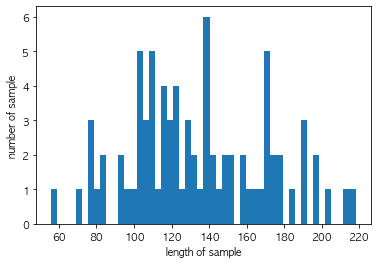

In [88]:
# 정해줄 길이를 찾기 위해 가장 긴 리뷰 길이 확인
max_length = max(len(l) for l in encoded)
print('가사의 최대 길이 : %d' % max_length)
print('가사의 최소 길이 : %d' % min(len(l) for l in encoded))
print('가사의 평균 길이 : %f' % (sum(map(len, encoded))/len(encoded)))
plt.hist([len(s) for s in encoded], bins=50)
plt.xlabel('length of sample')
plt.ylabel('number of sample')
plt.show()

In [89]:
# 문장마다 단어 갯수가 다르므로 sequence padding을 넣어서 문장의 길이 동일하게 만들기 
# 이거하려고 위에서 단어갯수 체크한거임

padding_paragraphs_encoding = keras.preprocessing.sequence.pad_sequences(encoded, maxlen=max_length, padding='post')
padding_paragraphs_encoding

array([[913, 891,   0, ...,   0,   0,   0],
       [913, 935, 907, ...,   0,   0,   0],
       [725,   0,   0, ...,   0,   0,   0],
       ...,
       [544,   0, 937, ...,   0,   0,   0],
       [807, 907, 944, ...,   0,   0,   0],
       [891,   0,   0, ...,   0,   0,   0]], dtype=int32)

In [90]:
print(len(list(padding_paragraphs_encoding)), len(list(padding_paragraphs_encoding)[1]))

80 218


In [91]:
# 분류항목['happy', 'sad', 'regret', 'indifference']를 수치로 변경하기
categories = train['감정'].to_list()

def category_encoding(category):
    if category == 'happy':
        return 0
    elif category == 'sad':
        return 1
    elif category == 'regret':
        return 2
    else:
        return 3

In [92]:
encoded_category = [category_encoding(category) for category in categories]
encoded_category[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [93]:
len(encoded_category)

80

---
# 가사 감정 RNN model

In [94]:
# train test data 만들기
from sklearn.model_selection import train_test_split


train_input, test_input, train_target, test_target = train_test_split(
    padding_paragraphs_encoding, encoded_category, test_size=0.2
)

In [95]:
# train val data 만들기
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2
)

In [96]:
import warnings
from tensorflow import keras 

# GPU 사용 설정
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = '3'

warnings.filterwarnings('ignore')

In [97]:
print(train_input.shape, val_input.shape)

(51, 218) (13, 218)


In [98]:
model = keras.Sequential()
# 문맥 생성 단계
model.add(keras.layers.SimpleRNN(64, input_shape=(218, 945)))
model.add(keras.layers.Dense(4, activation='softmax')) # 문장은 확률값을 구해야하므로

In [99]:
import numpy as np

In [100]:
train_oh = keras.utils.to_categorical(train_input)
train_oh.shape

(51, 218, 945)

In [101]:
print(np.sum(train_oh[0][0]))

1.0


In [102]:
val_oh = keras.utils.to_categorical(val_input)
val_oh.shape

(13, 218, 945)

In [103]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 64)                64640     
                                                                 
 dense (Dense)               (None, 4)                 260       
                                                                 
Total params: 64,900
Trainable params: 64,900
Non-trainable params: 0
_________________________________________________________________


In [104]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-3)
model.compile(
    optimizer=rmsprop,
    loss = 'sparse_categorical_crossentropy',
    metrics = 'accuracy'
    )

checkpoint_cb = keras.callbacks.ModelCheckpoint("Data/best-train_rnn-model.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=100,
    restore_best_weights= True
)

history = model.fit(
    np.array(train_oh),
    np.array(train_target),
    epochs=1000,
    #batch_size=64, # mini batch 경사 하강법
    validation_data = (np.array(val_oh), np.array(val_target)),
    callbacks = [checkpoint_cb, early_stopping_cb]
)

Epoch 1/1000
2/2 [==============================] - 1s 315ms/step - loss: 1.3968 - accuracy: 0.2353 - val_loss: 1.3508 - val_accuracy: 0.3846
Epoch 2/1000
2/2 [==============================] - 0s 76ms/step - loss: 1.4333 - accuracy: 0.2353 - val_loss: 1.3563 - val_accuracy: 0.2308
Epoch 3/1000
2/2 [==============================] - 0s 73ms/step - loss: 1.3593 - accuracy: 0.3725 - val_loss: 1.3848 - val_accuracy: 0.2308
Epoch 4/1000
2/2 [==============================] - 0s 76ms/step - loss: 1.3941 - accuracy: 0.1961 - val_loss: 1.3299 - val_accuracy: 0.3077
Epoch 5/1000
2/2 [==============================] - 0s 79ms/step - loss: 1.3589 - accuracy: 0.3529 - val_loss: 1.3567 - val_accuracy: 0.2308
Epoch 6/1000
2/2 [==============================] - 0s 72ms/step - loss: 1.3854 - accuracy: 0.2745 - val_loss: 1.3361 - val_accuracy: 0.4615
Epoch 7/1000
2/2 [==============================] - 0s 75ms/step - loss: 1.4075 - accuracy: 0.3137 - val_loss: 1.3894 - val_accuracy: 0.2308
Epoch 8/1000

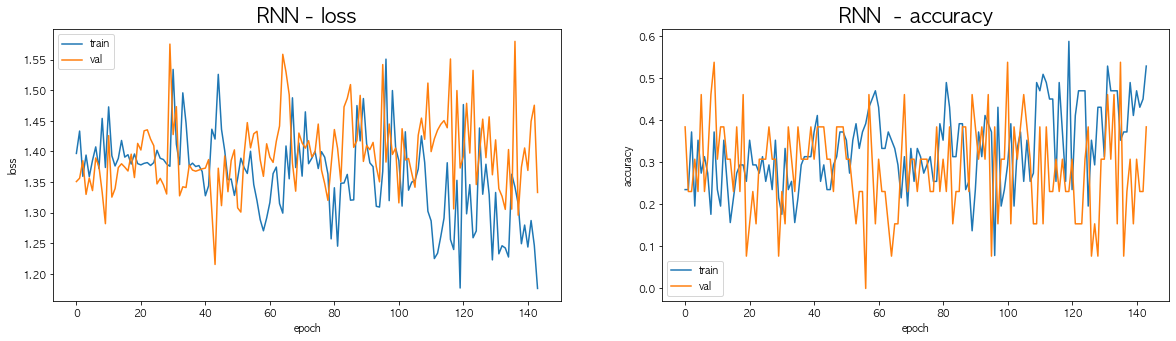

In [105]:
# 시각화 해보기
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(1,2,1) # 1행 2열의 첫번째다.
ax2 = fig.add_subplot(1,2,2) # 1행 2열의 두번째다.

ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])

ax1.set_xlabel('epoch')
ax2.set_xlabel('epoch')

ax1.set_ylabel('loss')
ax2.set_ylabel('accuracy')

ax1.legend(['train','val'])
ax2.legend(['train','val'])


ax1.set_title("RNN - loss", size=20)
ax2.set_title("RNN  - accuracy", size=20)
plt.show()

In [106]:
print("accuracy :", np.mean(history.history['accuracy']))
print("val_accuracy :", np.mean(history.history['val_accuracy']))

accuracy : 0.33197168555731577
val_accuracy : 0.2863247930072248
